## Задачка 11

Филя и Никита решили попытать счастья и попасть на стажировку в ЦБ. В качестве вступительного испытания, они получили листочки с задачками по терверу и случайным процессам. Одна из задач из листочка выглядела следующим образом:

Пусть $X \sim N(0, \sigma^2)$. Пусть $\Phi(x)$ — функция распределения для $N(0,1)$. Нужно найти математическое ожидание для случайной величины $\Phi(X)$. 

Собеседователи, дав Филе и Никите задание, сказали, что у них 2 часа и куда-то ушли. Пользоваться можно чем угодно (но это не точно). В голове у парней есть какое-то решение. Правда они в нём не уверены. Зато у них с собой есть ноутбуки. Помогите Филе и Никите оценить $E(\Phi(X))$ с помощью симуляций. Постройте для случайной величины $\Phi(X)$ гистограмму. На Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведут себя математическое ожидание и распределение при росте дисперсии?

__P.S.__ На стажировку в ЦБ парни конечно же не попали.

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

[1] 0.5000872

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


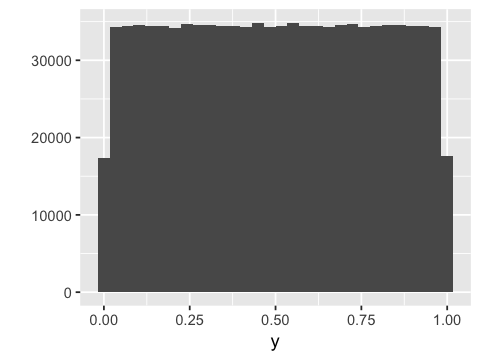

In [4]:
library('ggplot2')
# В этом пункте всё логично,  в соответствии с квантильным преобразованием 
# мы получили равномерное распределение

n_obs = 10^6
x <- rnorm(n_obs, mean=0, sd=1)
y <- pnorm(x)
mean(y)
qplot(y)

[1] 0.5011108

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


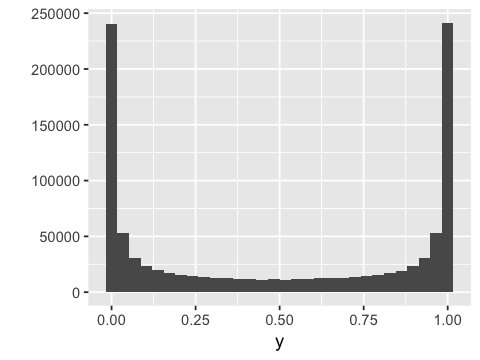

In [5]:
# Тут уже результат будет поинтереснее,
# распределение начало разъезжаться в разные стороны

n_obs = 10^6
x <- rnorm(n_obs, mean=0, sd=3)
y <- pnorm(x)
mean(y)
qplot(y)

[1] 0.4991211

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


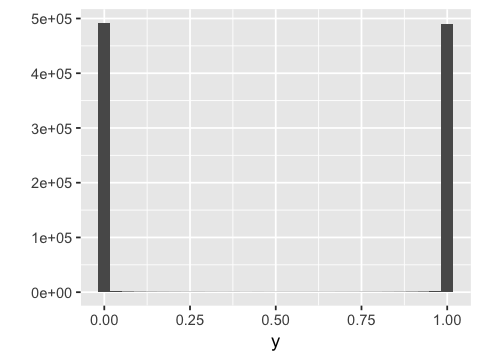

In [6]:
# При огромной дисперсии оно совсем-совсем разъехалось и 
# в пределе получится дискретная случайная величина! 

n_obs = 10^6
x <- rnorm(n_obs, mean=0, sd=100)
y <- pnorm(x)
mean(y)
qplot(y)

Давайте попробуем повыяснять почему такое происходит. Для этого решим задачку по-честному. $\Phi(x)$ - функция распределения, значит принимает значения на отрезке от $0$ до $1$. Найдём функцию распределения случайной величины $Y = \Phi(X)$. Будем делать это по определению: 

$$
F(y) = P(Y \le y) = \begin{cases}0, \text{ если } y \le 0 \\ 1, \text{ если } y > 1 \\ P(\Phi(X) \le y), \text{ если } y \in (0; 1].    \end{cases}
$$

Самая интересная тут последняя строчка. Немного поработаем с ней.

$$
P(\Phi(X) \le y) = P(X \le \Phi^{-1}(y)) = P \left( \frac{X}{\sigma} \le \frac{ \Phi^{-1}(y)}{\sigma} \right) = \Phi \left( \frac{ \Phi^{-1}(y)}{\sigma} \right).
$$

Дело осталось за малым, найти придел для функции распределения случайной величины $Y$. При $\sigma \to \infty$ выражение $\frac{ \Phi^{-1}(y)}{\sigma}$ сходится к нулю. Нормальное распределения симметрично относительно нуля. Значит $\Phi(0) = \frac{1}{2}$.  В пределе получаем функцию 

$$
F(y) = P(Y \le y) = \begin{cases}0, \text{ если } y \le 0 \\ 1, \text{ если } y > 1 \\ \frac{1}{2}, \text{ если } y \in (0; 1].    \end{cases}
$$

Как мы помним из лекций, функция распределения всегда задаёт какую-то одну конкретную случайную величину. В данном случае мы получили функцию распределения для случайной величины, принмающей либо значение $1$ либо $0$ с вероятностями $0.5$. Ровно этот результаь выше у нас получился при генерациях. 